<a href="https://colab.research.google.com/github/Shuvamjoy34/NumberCrunchers/blob/master/Car%20vs%20Bike%20vs%20Random%20Image%20Classification%20using%20Convolutional%20Neural%20Network(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
import os

In [160]:
import cv2

In [161]:
import numpy as np
import pandas as pd

In [162]:
from PIL import Image
import numpy as np
import os
import cv2
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.utils.data_utils import Sequence
from imblearn.over_sampling import RandomOverSampler
from imblearn.keras import balanced_batch_generator

In [163]:
GOOGLE_COLAB = True 
path = ""
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')
    path = "/content/drive/My Drive/image_classifier/"
training_data_dir = path + "data/Training"
validation_data_dir = path + "data/Validation" 
test_data_dir = path + "data/Test" 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [164]:
from keras.preprocessing.image import ImageDataGenerator
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [165]:
# Hyperparams
IMAGE_SIZE = 100
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS = 20
BATCH_SIZE = 5
TEST_SIZE = 20

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

In [ ]:
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical")
validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical")
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=1,
    class_mode="categorical", 
    shuffle=False)

Found 80 images belonging to 3 classes.
Found 20 images belonging to 3 classes.
Found 0 images belonging to 0 classes.


In [ ]:
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical")
validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical")
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=1,
    class_mode="categorical", 
    shuffle=False)

Found 80 images belonging to 3 classes.
Found 20 images belonging to 3 classes.
Found 0 images belonging to 0 classes.


In [166]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [169]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(training_data_dir,
                                                 target_size = (64, 64),
                                                 batch_size = 5
                                                 )



validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_set = validation_datagen.flow_from_directory(validation_data_dir,
                                            target_size = (64, 64),
                                            batch_size = 5
                                          )

Found 80 images belonging to 3 classes.
Found 20 images belonging to 3 classes.


In [95]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

In [96]:
# Directory with our training car pictures
train_car_dir = os.path.join(training_data_dir , 'car')

# Directory with our training bike pictures
train_bike_dir = os.path.join(training_data_dir, 'bike')

# Directory with our training random pictures
train_random_dir = os.path.join(training_data_dir, 'random')

# Directory with our validation car pictures
validation_car_dir = os.path.join(validation_data_dir, 'car')

# Directory with our validation bike pictures
validation_bike_dir = os.path.join(validation_data_dir, 'bike')

# Directory with our validation random pictures
validation_random_dir = os.path.join(validation_data_dir, 'random')

In [97]:
train_car_fnames = os.listdir(train_car_dir)
print(train_car_fnames[:10])

train_bike_fnames = os.listdir(train_bike_dir)
train_bike_fnames.sort()
print(train_bike_fnames[:10])


train_random_fnames = os.listdir(train_random_dir)
train_random_fnames.sort()
print(train_random_fnames[:10])

['image_1.jpg.jpg', 'image_2.jpg.jpg', 'image_3.jpg.jpg', 'image_4.jpg.jpg', 'image_5.jpg.jpg', 'image_6.jpg.jpg', 'image_7.jpg.jpg', 'image_8.jpg.jpg', 'image_9.jpg.jpg', 'image_10.jpg.jpg']
['image_31.jpg.jpg', 'image_32.jpg.jpg', 'image_33.jpg.jpg', 'image_34.jpg.jpg', 'image_35.jpg.jpg', 'image_36.jpg.jpg', 'image_37.jpg.jpg', 'image_38.jpg.jpg', 'image_39.jpg.jpg', 'image_40.jpg.jpg']
['image_52.jpg.jpg', 'image_53.jpg.jpg', 'image_54.jpg.jpg', 'image_55.jpg.jpg', 'image_56.jpg.jpg', 'image_57.jpg.jpg', 'image_58.jpg.jpg', 'image_59.jpg.jpg', 'image_60.jpg.jpg', 'image_61.jpg.jpg']


In [98]:
print('total training car images:', len(os.listdir(train_car_dir)))
print('total training bike images:', len(os.listdir(train_bike_dir)))
print('total training random images:', len(os.listdir(train_random_dir)))
print('total validation car images:', len(os.listdir(validation_car_dir)))
print('total validation bike images:', len(os.listdir(validation_bike_dir)))
print('total validation random images:', len(os.listdir(validation_random_dir)))


total training car images: 20
total training bike images: 20
total training random images: 40
total validation car images: 5
total validation bike images: 5
total validation random images: 10


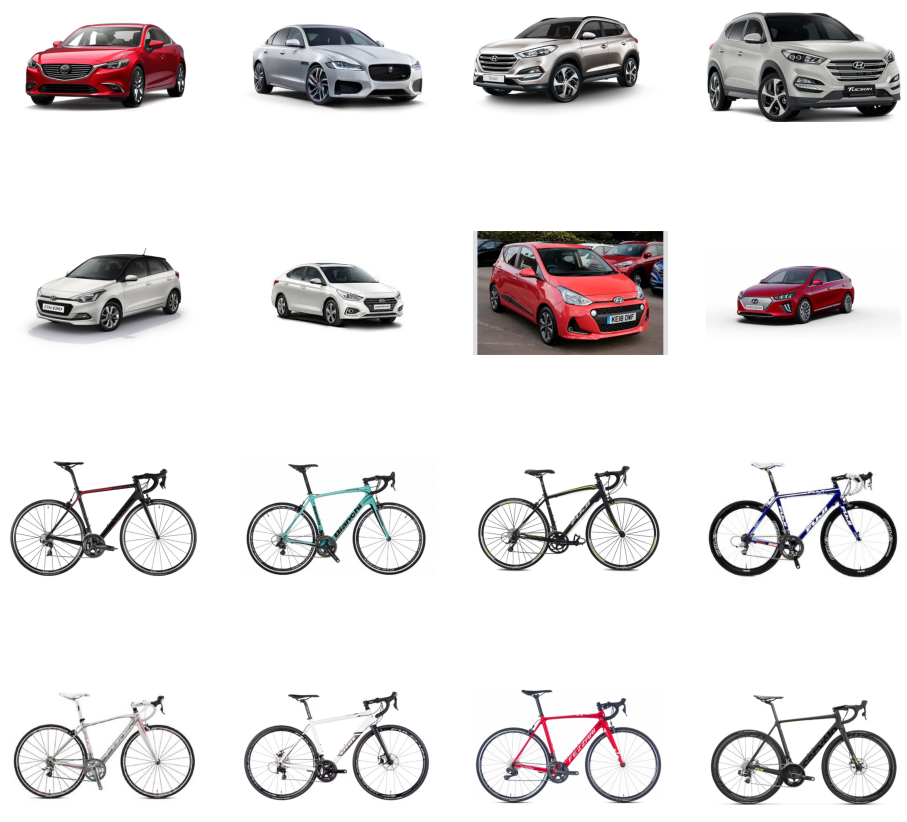

In [99]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_car_pix = [os.path.join(train_car_dir, fname) 
                for fname in train_car_fnames[pic_index-8:pic_index]]
next_bike_pix = [os.path.join(train_bike_dir, fname) 
                for fname in train_bike_fnames[pic_index-8:pic_index]]




for i, img_path in enumerate(next_car_pix+next_bike_pix ):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [170]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [171]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense,Flatten
from tensorflow.keras.losses import categorical_crossentropy
from keras.layers import Dropout



In [172]:
classifier = Sequential()

classifier.add(Conv2D(filters=32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(64,64,3)))
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Conv2D(filters=32,kernel_size=(3,3),padding='valid',activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Dropout(0.2))

classifier.add(Flatten())

classifier.add(Dense(500,activation="relu"))

classifier.add(Dropout(0.2))

classifier.add(Dense(1,activation="sigmoid"))#2 represent output layer neurons 

classifier.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 500)             

In [173]:
classifier.compile(optimizer = 'adam', loss=lambda *args: tf.keras.losses.binary_crossentropy(*args, from_logits=True), metrics = ['accuracy'])

In [175]:
classifier.fit_generator(training_set, steps_per_epoch=16,  validation_data = validation_set, epochs =20,validation_steps=4)

Epoch 1/20
16/16 [==============================] - 3s 164ms/step - loss: 0.6931 - accuracy: 0.6667 - val_loss: 0.6931 - val_accuracy: 0.6667
Epoch 2/20
16/16 [==============================] - 2s 145ms/step - loss: 0.6931 - accuracy: 0.6667 - val_loss: 0.6931 - val_accuracy: 0.6667
Epoch 3/20
16/16 [==============================] - 2s 156ms/step - loss: 0.6931 - accuracy: 0.6667 - val_loss: 0.6931 - val_accuracy: 0.6667
Epoch 4/20
16/16 [==============================] - 3s 158ms/step - loss: 0.6931 - accuracy: 0.6667 - val_loss: 0.6931 - val_accuracy: 0.6667
Epoch 5/20
16/16 [==============================] - 2s 152ms/step - loss: 0.6931 - accuracy: 0.6667 - val_loss: 0.6931 - val_accuracy: 0.6667
Epoch 6/20
16/16 [==============================] - 3s 160ms/step - loss: 0.6931 - accuracy: 0.6667 - val_loss: 0.6931 - val_accuracy: 0.6667
Epoch 7/20
16/16 [==============================] - 3s 157ms/step - loss: 0.6931 - accuracy: 0.6667 - val_loss: 0.6931 - val_accuracy: 0.6667
Epoch 